# [POLSCI 5] Immigration Databook

Estimated Time: 30-40 minutes <br>

Databook created by Lauren Hom and Ravi Singhal in collaboration with Professor Aila Matanock and Head GSI Alex Stephenson for Political Science 5: Introduction to International Relations

Today we will be examining official data on immigration to the United States, collected by the U.S. Department of Homeland Security. Using these data, we will analyze economic and immigration patterns in North and Central America and tie them to events taking place at the time.

### Table of Contents 
1. [Jupyter Introduction ](#0) <br>
2. [The Datasets](#1)<br>
3. [Dataset 1: Immigrants to the U.S.](#2)<br>
    3.1 [Rows](#2b)<br>
    3.2 [Columns](#2a)<br>
    3.3 [Mexico](#2c)<br>
4. [Dataset 2: Immigration by Class of Admission](#4)<br>
    4.1 [Rows](#4b)<br>
    4.2 [Columns](#4a)<br>
    4.3 [Exploration of Central America](#4c)<br>
5. [Homework](#5)<br>

[Data Science Resources at Berkeley](#6)<br>

[Bibliography](#7)<br>

<br>

# 1. Jupyter Introduction <a id='0'></a>

This file, displayed in your browser, is a Jupyter Notebook. Jupyter Notebooks provide an interactive interface through which students and professionals can write text and work with computer code- in this case, the Python programming language. We will be using this application to analyze the United States Department of Homeland Security's Yearbook of Immigration Statistics (DHS, 2017).

Jupyter Notebooks are composed of both regular text and *code cells*. Code cells have a gray background, as seen in the cell below. In order to run a code cell, click into the cell and press `Shift + Enter` or hit the `▶| Run` button in the toolbar at the top.

Try running the code cell below. If done correctly, the word "Success" will be printed below the cell.

In [3]:
# This cell sets up the notebook. Just run this cell.
from datascience import * # Loads a python library that will be used to analyze the data
import numpy as np # Loads a python library that allows for math functionality

%matplotlib inline
import matplotlib.pyplot as plt # Loads a python library that allows for the creation of plots
plt.style.use('fivethirtyeight')

print("Success!")

Success!


Congratulations, you just ran your first code cell! Now that we've installed some important Python libraries to be used later in the notebook, let's start exploring the data.

<br>

# 2. The Datasets <a id='1'></a>

The Yearbook of Immigration Statistics (DHS, 2017) contains information about immigration to the United States. Below is a description of the data from the Department of Homeland Security (DHS) website:

> "The 2017 Yearbook of Immigration Statistics is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns."

This databook will explore two datasets from the Yearbook of Immigration Statistics (DHS, 2017), containing information about:

* Foreign nationals granted lawful permanent residence (i.e., immigrants who receive a "green card"), and
* Immigrants by classes of admission

**Note:** The data are collected by *fiscal years*, which differ from calendar years. A fiscal year is a 12-month period of time used by the U.S. government for accounting purposes. For each of the years used in this databook's analysis, the fiscal year began on October 1st of the year before and ended on September 30th of that year (for example, the 1996 fiscal year began on October 1, 1995 and ended on September 30, 1996).

To read more about the Yearbook of Immigration Statistics (DHS, 2017), click [here](https://www.dhs.gov/immigration-statistics/yearbook/2017).


<br>

# 3. Dataset 1: Immigrants to the U.S. <a id='2'></a>

The first dataset we will explore contains data on the number of immigrants who obtained lawful permanent residence or received conditional resident status to stay in the U.S. between 1995 and 2017 for any given country. Run the code cell below to load the data and display, as an example, the first five fiscal years for immigrants from Cuba.

In [4]:
# read in the dataset
birth_country = Table.read_table('ImmigrantsRegionCountry.csv').where('fiscal_year', are.above(1995))
birth_country.set_format('fiscal_year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
birth_country.where('country', 'Cuba').show(5)

fiscal_year,country,total
1996,Cuba,26466
1997,Cuba,33587
1998,Cuba,17375
1999,Cuba,14132
2000,Cuba,18960


The quantity seen in the `total` column of the table describes the number of people who were born in the specified country and immigrated to the United States. Note: immigrants are described as "born" in a given country rather than being "from" that country. Despite being born in the listed country, they might have most recently lived or stayed in a different country.

#newpage
### Discussion A

These data are on lawful permanent residents (green card holders), which are a subset of all documented immigrants. They contain information that can be collected by embassies and border guards. This information may be flawed- for example, people might falsely report their country of origin. 

Discuss the following questions with a partner: 

* Why might someone want to falsify their country of origin?

Write a short response to this question in the following cell. Edit the cell by clicking on the bolded text twice, then replace the text with your answer.


#student
**_Write your response here!_**

#newpage
### Discussion B

Discuss the following questions with a partner:

* What other types of immigration might occur?
* How would you measure undocumented immigrants in the United States?

Write a short response to these questions in the following cell. Edit the cell by clicking on the bolded text twice, then replace the text with your answer.


#student
**_Write your response here!_**

<br>

## 3.1 Rows <a id='2b'></a>

Each row in this dataset displays the total number of immigrants admitted during a given fiscal year and born in a given country. Consider a subset of the data: the rows describing immigrants born in Cuba. Run the code cell below to take a look.

In [5]:
# show the total numbers of immigrants born in Cuba admitted per fiscal year
birth_country.where('country', 'Cuba').show()

fiscal_year,country,total
1996,Cuba,26466
1997,Cuba,33587
1998,Cuba,17375
1999,Cuba,14132
2000,Cuba,18960
2001,Cuba,27453
2002,Cuba,28182
2003,Cuba,9262
2004,Cuba,20488
2005,Cuba,36261


If we look at the first row, we see that in fiscal year 1996 (October 1, 1995 through September 30, 1996), there were 26,466 immigrants born in Cuba who were granted lawful permanent residence.

<br>

## 3.2 Columns <a id='2a'></a>

There are a total of 3 columns in this dataset:
- `fiscal_year` which includes years ranging from 1996 to 2017
- `country` which lists the country/territory where immigrants reported they were born
- `total` which represents the total number of immigrants from the given country for the given fiscal year

The next cell displays the first five rows of dataset 1:

In [6]:
# Show the first five rows of immigration data by fiscal year and birth country
birth_country.show(5)

fiscal_year,country,total
1996,Afghanistan,1263
1996,Albania,4007
1996,Algeria,1059
1996,American Samoa,2
1996,Andorra,5


There are a total of 237 countries and territories represented in the data. Run the code cell below to see the number of occurrences of each country in the dataset:

In [7]:
# Calculate the number of occurrences of each location in the birth_country data
countries_regions = birth_country.group('country')
# Display the counts for the first 10 countries and regions
countries_regions.show(10)

country,count
Afghanistan,22
Albania,22
Algeria,22
American Samoa,14
Andorra,2
Angola,22
Anguilla,22
Antigua-Barbuda,22
Argentina,22
Armenia,22


Now that we've identified the rows and columns in dataset 1, let's use the data to look more deeply at a single country.

<br>

## 3.3 Mexico Analysis <a id='2c'></a>

In this section, we examine data for Mexico, paying particular attention to the `total` column before and after 2008. Our goal is to examine the total number of immigrants granted green cards in each fiscal year.

First, let's filter the dataset to only contains immigration count for people born in Mexico.

In [8]:
# Shows only the data for country Mexico 
mexico = birth_country.where('country', 'Mexico')
mexico.show()

fiscal_year,country,total
1996,Mexico,163572
1997,Mexico,146865
1998,Mexico,131575
1999,Mexico,147573
2000,Mexico,173493
2001,Mexico,205560
2002,Mexico,218822
2003,Mexico,115585
2004,Mexico,175411
2005,Mexico,161445


We will use this subset of the data as the basis for our analysis.

### Visualize the Data 

When looking at trends in total number of immigrants granted green cards, it might interest us to know the minimum and maximum total numbers of immigrants as well as the years corresponding with those quantities. 

Run the cell below to identify the minimum and the corresponding year.

In [9]:
# Row with the MINIMUM total immigration
lowest_total = min(mexico.column('total')) 
mexico.where('total', lowest_total)

fiscal_year,country,total
2003,Mexico,115585


In comparison, run the cell below to identify the maximum and the corresponding year.

In [10]:
# Row with the MAXIMUM total immigration in Mexico
highest_total = max(mexico.column('total'))
mexico.where('total', highest_total)

fiscal_year,country,total
2002,Mexico,218822


Here are the data showing the total number of immigrants granted green cards between 2008 and 2017:

In [11]:
# total numbers of immigrants, 2008-17
mexico.where('fiscal_year', are.between_or_equal_to(2008, 2017))

fiscal_year,country,total
2008,Mexico,189989
2009,Mexico,164920
2010,Mexico,139120
2011,Mexico,143446
2012,Mexico,146406
2013,Mexico,135028
2014,Mexico,134052
2015,Mexico,158619
2016,Mexico,174534
2017,Mexico,170581


A visualization may make it easier to compare the number of immigrants granted green cards between 1995 and 2017. Run the following cell to generate a line plot. The vertical axis shows the number of immigrants, while the horizontal axis shows the year.

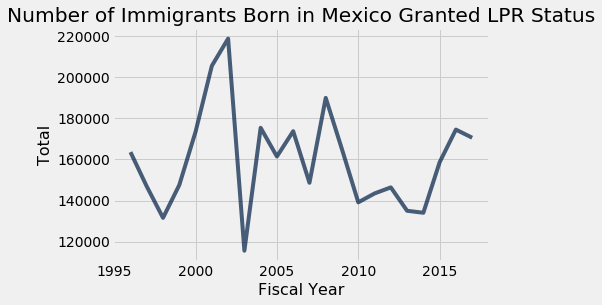

In [12]:
mexico.plot('fiscal_year', 'total') # Generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants Born in Mexico Granted LPR Status') # Titles the plot
plt.ylabel('Total') # Creates label for the x-axis
plt.xlabel('Fiscal Year') # Creates label for the y-axis
plt.show()

#newpage
### Discussion C

#### Important IPE events affecting Mexico:

* January 1, 1994: the North American Free Trade Agreement, or [NAFTA](https://ustr.gov/trade-agreements/free-trade-agreements/north-american-free-trade-agreement-nafta), goes into effect
* December 1994: the sudden devaluation of Mexican currency sparks the [Mexican Peso Crisis](https://www.oxfordscholarship.com/view/10.1093/acprof:oso/9780198296867.001.0001/acprof-9780198296867-chapter-7)
* 2001: the United States experiences an [economic recession](https://www.nber.org/cycles/november2001/recessnov.html)
* 2008: the United States experiences the [Great Recession](https://irle.berkeley.edu/what-really-caused-the-great-recession/)

Discuss the following questions with a partner:

1. How does the graph change in each of those years?
2. Why might economic shocks account for the changes in the graph?

Write a short response to these questions in the following cell. Edit the cell by clicking on the bolded text twice, then replace the text with your answer.


#student
**_Write your response here!_**

<br>

# 4. Dataset 2: Immigrants by Class of Admission <a id='4'></a>

The other dataset we will explore from the same source provides information on the type of admission (class) under which immigrants were granted lawful permanent residence. The Department of Homeland Security describes the Immigrant Classes of Admissions below:

> "A lawful permanent resident (LPR) or “green card” recipient may live and work anywhere in the United States and may apply to become U.S. citizens if they meet certain eligibility and admissibility requirements. The Immigration and Nationality Act (INA) provides several broad classes of admission for foreign nationals to gain LPR status, the largest of which focuses on admitting immigrants for the purpose of family reunification. Other major categories include economic and humanitarian immigrants, as well as immigrants from countries with relatively low levels of immigration to the United States." ([DHS 2017](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA))

Here are the first 5 rows of the dataset. There are 20,907 rows and 4 columns in total.

In [13]:
class_admission = Table.read_table('immigrants-class-perm.csv') # read in the dataset
class_admission.set_format('fiscal_year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
class_admission.show(5)

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6
Afghanistan,Cancellation of Removal,2000,7
Afghanistan,Cancellation of Removal,2001,3
Afghanistan,Cancellation of Removal,2002,1
Afghanistan,Cancellation of Removal,2004,5


<br>

## 4.1. Rows <a id='4b'></a>

Each *row* in the dataset gives the total number of immigrants admitted under the stated class for a given country in a particular fiscal year. 

For example, here is the 70th row of the dataset. This row shows that there were 376 immigrants from Afghanistan who were granted lawful permanent residence in 2008 as immediate relatives of U.S. citizens. 

In [14]:
class_admission.take(70) # takes the 70th row of the table

country,type,fiscal_year,total
Afghanistan,Immediate relatives of U.S. citizens,2008,376


<br>

## 4.2. Columns <a id='4a'></a>
The `type` column refers to the class under which immigrants were granted lawful permanent residence. There are a total of 9 types or classes in the table.

In [15]:
# Run this cell to display all of the "types" of classes in the table, 
# sorted by the type with the most occurrences 
types = class_admission.group('type').sort('count', descending = True) 
types

type,count
Immediate relatives of U.S. citizens,4046
Employment-based preferences,3594
Family-sponsored preferences,3418
Diversity,3179
Refugees and asylees,3115
Other,2673
Cancellation of Removal,658
IRCA legalization,131
Suspension of Deportation,93


#newpage
### Discussion D

With a partner, choose two types that you are unsure about. Each partner should look up one of the types [here](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA). Briefly discuss what the types mean. List the two types and a short description of each in the following cell. Edit the cell by clicking on the bolded text twice, then replace the text with your answer.


#student
**_Write your response here!_**

<br>

## 4.3. Exploration of Central America <a id='4c'></a>

Finally, we will look at the number of immigrants admitted under the "Refugees and Asylees" class for Honduras, El Salvador, and Guatemala.

In [16]:
# Filter data by country
guatemala_refugee = class_admission.where('country', 'Guatemala').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Guatemala total')
honduras_refugee = class_admission.where('country', 'Honduras').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Honduras total')
elsalvador_refugee = class_admission.where('country', 'El Salvador').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'El Salvador total')

# Show the first five rows of El Salvador data
elsalvador_refugee.show(5)

fiscal_year,El Salvador total
1997,263
1998,127
1999,46
2000,76
2001,192


The subset of data for El Salvador is displayed above.

Run the next cell to subset to the data for those three countries into one table.

In [17]:
# Combine the data for Honduras, El Salvador, and Guatemala into one table
latin_refugees = honduras_refugee.join('fiscal_year', elsalvador_refugee).join('fiscal_year', guatemala_refugee)
latin_refugees.show(5)

fiscal_year,Honduras total,El Salvador total,Guatemala total
1997,121,263,234
1998,107,127,261
1999,48,46,106
2000,62,76,139
2001,124,192,451


Now we can create the line plot of the total number of immigrants admitted under the "Refugees and Asylees" class from 1997 to 2017 by country.

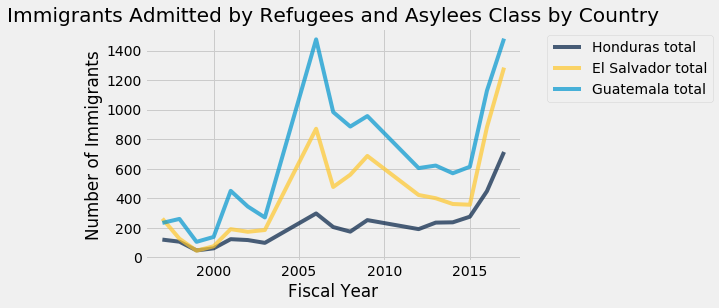

In [18]:
# Create a line plot for each of the three countries
latin_refugees.plot('fiscal_year')
plt.title('Immigrants Admitted by Refugees and Asylees Class by Country')
plt.ylabel("Number of Immigrants")
plt.xlabel('Fiscal Year')
plt.show()

#newpage
### Discussion E

Central America experienced several important conflict events during this time span:

#### Conflict Events in Central America

* The El Salvador Gang Truce (https://www.tandfonline.com/doi/full/10.1080/1057610X.2018.1430654) 

* The Mexican Drug War (https://www.cfr.org/backgrounder/mexicos-drug-war) 

Compare the trend of each country to each other. Discuss the following questions with a partner:

* Do the three lines follow a similar trend? 
* Why might this be the case? 

Write a short response to these questions in the following cell. Edit the cell by clicking on the bolded text twice, then replace the text with your answer.


#student
**_Write your response here!_**

<br>

---

# Homework <a id='5'></a>


---

Choose one of the following datasets to examine:

1) [International Migration Stock. United Nations Population Division.](https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates19.asp)

> Contains estimates of international migrant by age, sex and origin for 1990, 1995, 2000, 2005, 2010, 2015 and 2019 for all countries and areas of the world.

> NOTE: For the assignment, click on link above, then click on the top link on that page that says “[total international migrant stock.](https://www.un.org/en/development/desa/population/migration/data/estimates2/data/UN_MigrantStockTotal_2019.xlsx)”  In the spreadsheet that opens, click on the tab at the bottom for “table 3”, which shows immigrants as a percent of the total population, for many categories.  Look at rows 14 through 20, which show the percentages for world regions.

2) [OECD International Migration Statistics Database. Organization for Economic Cooperation and Development.](https://www-oecd-ilibrary-org.libproxy.berkeley.edu/social-issues-migration-health/data/oecd-international-migration-statistics_mig-data-en)

> Contains data on foreign and foreign-born population, migration flows, naturalizations and labor market outcomes. Drill into the database to change indicators, time periods, and countries.

> NOTE: For the assignment, click on the link above (be sure to use this link, since this is a dataset from the library, and be sure to be logged into your library account!).  Then, click on the purple cube to the right of the top link, “International Migration Database”.  Once in the spreadsheet, you can look at any of the three data tables linked in the top left (international migration database, or, the two tables on employment).

3) [Estimated Unauthorized Immigrant Population by State  Pew Research Center, 2016](https://www.pewresearch.org/hispanic/wp-content/uploads/sites/5/2019/02/Pew-Research-Center_U-S-Unauthorized-Immigrant-Population-By-State-Tables-2016_2019-02-05.xlsx)

> Contains data estimates on numbers of unauthorized immigrants by state, with change over time, and data on occupation and industry.  A report using the dataset, including methodology, can be found [here](https://www.pewresearch.org/hispanic/2018/11/27/u-s-unauthorized-immigrant-total-dips-to-lowest-level-in-a-decade/).

4) BONUS!! Get to know ICPSR (13,000 datasets, available to UC Berkeley community, requires account)

> [ICPSR (Intra-university Consortium for Political and Social Research)](https://www.icpsr.umich.edu/icpsrweb/) is a huge and respected collection of social science data sets, of which Berkeley is a member.  You can search for data sets related to immigration, and either download them and analyze them or analyze them right in your browser, after setting up an ICPSR account related to your Berkeley affiliation.

> The option to do analysis right in your browser is called online analysis and is available for some datasets.  This means you don’t have to download the data and do anything to them in order to get the answers you want.  Try this:

> From the ICPSR home page, under Find Data, select Find Data. In the search box, enter immigration as your search term. On the next screen, under “Data Format”, select “online analysis”.  One of the top results (#8 as of 11-13-19) is “Children of Immigrants Longitudinal Study”.  Click on the link with that title. Now you are in that dataset!  You can download it, and you’ll also see the tab for Data & Documentation.  But for now, click on the bar that says “Analyze Online”, and select “Full Analysis Capabilities” in the pop-up window.

> Once you get past the login and permissions screens, click on the plus button to the left of the 2005 Youth Adaptation and Growth Questionnaire.  This will take you to that subsection of the study.

> Now, by clicking on the plus buttons, you can see the questions asked in that year.  See if you can set up an analysis!  First, open the respondent demographics section, click on “State Current Residence”, and then on the top left, click on “Row” where it says “Copy To”.  Repeat this for the section called “Civil Status and Political Preference”, selecting the variable “Respondent Citizenship Status” and then on the buttons above clicking on “Column” next to “Copy To”.   On the right side of the screen, you will now be able to give your table a title (“Test” is fine!) and click on the “Run the Table” button.   The table you get will be a little confusing—What is ae and ap in the list of states? (you will need to look at documentation)  Why are there so many cells with small numbers, but lots for California and Florida? (look at the title of the study)  So many questions!  This is the world of data! 

Library Resources for Data:
Many of the datasets you may use at Berkeley are provided by the library (such as #2 above and a portion of ICPSR).  For more information, [here are some pages from the library’s research guides](https://guides.lib.berkeley.edu/?b=s), and you can always [talk with the librarian for your subject](https://www.lib.berkeley.edu/help/subject-specialists)!

* [Political Science Data](https://guides.lib.berkeley.edu/Intro-to-Political-Science-Research/)
* [Economics Data](https://guides.lib.berkeley.edu/c.php?g=4395&p=15528)
* [Sociology Data](https://guides.lib.berkeley.edu/c.php?g=935472&p=6811880)

#newpage
### Question 1:

Which dataset did you choose? Describe in your own words what the dataset is. (2-5 sentences)


#student
**_Write your response here!_**

#newpage
### Question 2:

What are the rows in this dataset? What are the columns in this dataset? (2+ sentences)


#student
**_Write your response here!_**

#newpage
### Question 3:

Choose any substantive variable [often a column], look at it, and describe in your own words (1) what variation it captures, (2) what its minimum and maximum values are, and (3) what values it takes in a couple of notable cases [often rows]. (3+ sentences)


#student
**_Write your response here!_**

#newpage
### Question 4:

What kind of question could you use this variable to analyze? Is there related data that you would want to also see on this question? Think creatively. (3-5 sentences).
<br>

#student
**_Write your response here!_**

<br>

---

<br>

## Submitting your work
To convert your work to a pdf:
- run the following cell
- right-click the link that says "Download this and submit to gradescope"
- click "save link as" to save the pdf

<div class="alert alert-warning">
NOTE: the link will say "Submit to Gradescope", but please follow your professor's instructions on where to submit the pdf 
</div>

<div class="alert alert-warning">
NOTE II: if you're having trouble downloading the databook, make sure you're <b>right-clicking</b> the link and selecting "save link as"
</div>

In [1]:
!pip install gsExport -q
import gsExport
gsExport.generateSubmission("Immigration.ipynb")

Processing Immigration.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF


<br><br><br>

# Data Science Resources at UC Berkeley <a id='6'></a>
If you need assistance with this notebook, our peer advisors are happy to help. You can find their drop-in hours [here](https://data.berkeley.edu/academics/resources/peer-consulting). You can also email ds-peer-consulting@berkeley.edu to book an appointment if the times conflict with your schedule.

If you are interested in data science, a great course to start with is Data 8, designed for students with no previous programming or statistics experience. For the full list of courses and degree programs we offer, click [here](https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings).

# Bibliography <a id='7'></a>
1. United States. Department of Homeland Security. *Yearbook of Immigration Statistics: 2017*. Washington,  D.C.: U.S. Department of Homeland Security, Office of Immigration Statistics, 2017. https://www.dhs.gov/immigration-statistics/yearbook/2017